In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
image = cv2.imread('/home/sharon/vs_code/project/road_img.webp')

In [4]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

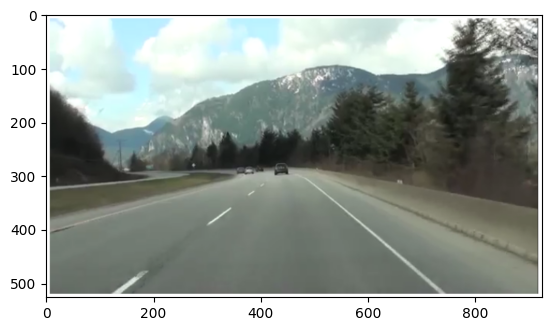

In [5]:
plt.imshow(image)

In [6]:
print(image.shape)
height = image.shape[0]
width = image.shape[1]

(526, 925, 3)


In [7]:
region_of_interest_vertices = [(0,height),(width/2,height/2),(width,height)]

In [8]:
def region_of_interest(img, vertices):                                         
    mask = np.zeros_like(img)                                     
    match_mask_color = 255                                      
    cv2.fillPoly(mask, vertices, match_mask_color)                # Fills the ROI with white color in the mask
    masked_image = cv2.bitwise_and(img,mask)                      # apply the mask on the input image,result==> image where only 'ROI' is visible,and rest is black.
    return masked_image

In [16]:
gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
canny_img = cv2.Canny(gray_img, 100, 120)            # the Canny edge detection is applied to the grayscale image

cropped_img = region_of_interest(canny_img,np.array([region_of_interest_vertices],np.int32))

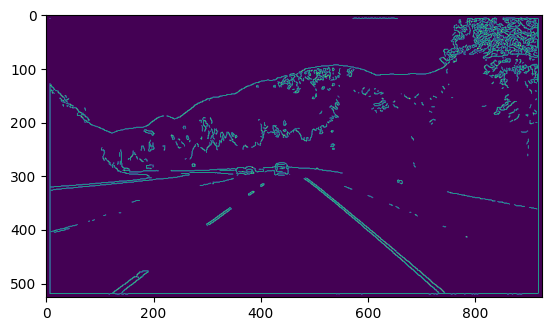

In [17]:
plt.imshow(canny_img)

In [75]:
lines = cv2.HoughLinesP(cropped_img, rho=6, theta=np.pi/60, threshold=140, lines=np.array([]) ,minLineLength=25, maxLineGap=20)  # used for line detection, lines = empty array

def draw_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0],img.shape[1],3),dtype = np.uint8)          # create a blank image with same shape

    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(blank_image, (x1,y1), (x2,y2), (0,255,0), thickness=3)

    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)                       # Overlay the lines onto the original image and transperancy

    return img     

In [76]:
image_with_lines = draw_the_lines(image, lines)

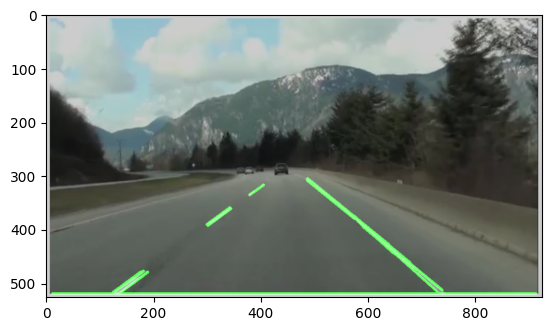

In [77]:
plt.imshow(image_with_lines)
plt.show()